# **Problem Recommendation for Online Coding Platforms**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [79]:
problem_df = pd.read_csv('/content/drive/MyDrive/FoDS/Project/problem_data.csv')
problem_df.head()

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [80]:
problem_df.shape

(6544, 4)

In [81]:
problem_df.columns

Index(['problem_id', 'level_type', 'points', 'tags'], dtype='object')

In [82]:
user_df = pd.read_csv('/content/drive/MyDrive/FoDS/Project/user_data.csv')
user_df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498


In [83]:
sub_df = pd.read_csv('/content/drive/MyDrive/FoDS/Project/submissions.csv')
sub_df.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [84]:
sub_df.isnull().sum()

user_id           0
problem_id        0
attempts_range    0
dtype: int64

In [85]:
problem_df.isnull().sum()

problem_id       0
level_type     133
points        3917
tags          3484
dtype: int64

In [86]:
temp_df = sub_df.merge(problem_df, on='problem_id')
temp_df.head()

,user_id,problem_id,attempts_range,level_type,points,tags
0,user_232,prob_6507,1,B,1000.0,strings
1,user_2490,prob_6507,3,B,1000.0,strings
2,user_684,prob_6507,3,B,1000.0,strings
3,user_316,prob_6507,1,B,1000.0,strings
4,user_779,prob_6507,1,B,1000.0,strings


In [87]:
temp_df = temp_df.merge(user_df, on='user_id')
temp_df.head()

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_232,prob_6507,1,B,1000.0,strings,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
1,user_232,prob_5071,4,A,500.0,implementation,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
2,user_232,prob_703,2,A,500.0,"brute force,implementation",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
3,user_232,prob_3935,1,C,1000.0,"greedy,sortings",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
4,user_232,prob_164,2,A,500.0,"brute force,constructive algorithms,math",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935


In [88]:
df = temp_df.copy()

In [89]:
df.columns

Index(['user_id', 'problem_id', 'attempts_range', 'level_type', 'points',
       'tags', 'submission_count', 'problem_solved', 'contribution', 'country',
       'follower_count', 'last_online_time_seconds', 'max_rating', 'rating',
       'rank', 'registration_time_seconds'],
      dtype='object')

In [90]:
df.shape

(155295, 16)

In [91]:
df.dtypes

user_id                       object
problem_id                    object
attempts_range                 int64
level_type                    object
points                       float64
tags                          object
submission_count               int64
problem_solved                 int64
contribution                   int64
country                       object
follower_count                 int64
last_online_time_seconds       int64
max_rating                   float64
rating                       float64
rank                          object
registration_time_seconds      int64
dtype: object

In [92]:
df.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
level_type                     620
points                       29075
tags                         15427
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
dtype: int64

In [93]:
df['country'].mode()[0], df['level_type'].mode()[0], df['tags'].mode()[0], df['points'].mode()[0]

('India', 'A', 'implementation', 500.0)

In [94]:
df['points'].mean(), df['points'].min()

(993.3023688797338, -1.0)

In [95]:
df[df['points']<0]

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
136378,user_1038,prob_5031,3,B,-1.0,NaN,928,888,45,Romania,229,1505579842,654.243,610.952,expert,1371299266


In [96]:
negative_points = df[df['points'] < 0].index
df.drop(negative_points, inplace = True)

In [97]:
df[df['points']<0]

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds


In [98]:
df['points'].mean(), df['points'].min()

(993.3102464763625, 3.0)

In [99]:
df['country'].fillna('India', inplace=True)

In [100]:
df['level_type'].fillna('A', inplace=True)

In [101]:
df['points'].fillna(500.0, inplace=True)

In [102]:
df['tags'].fillna(df['tags'].mode()[0], inplace=True)

In [103]:
df.isnull().sum()

user_id                      0
problem_id                   0
attempts_range               0
level_type                   0
points                       0
tags                         0
submission_count             0
problem_solved               0
contribution                 0
country                      0
follower_count               0
last_online_time_seconds     0
max_rating                   0
rating                       0
rank                         0
registration_time_seconds    0
dtype: int64

**Checking for Outliers**

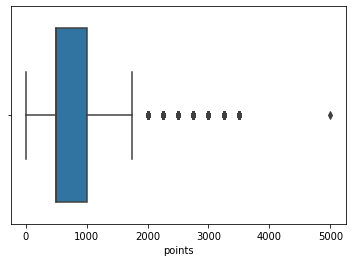

In [104]:
sns.boxplot(x=df['points']);

**Using IQR method**

In [105]:
q1 = np.percentile(df['points'], 25)
q1

500.0

In [106]:
q3 = np.percentile(df['points'], 75)
q3

1000.0

In [107]:
iqr = q3 - q1
iqr

500.0

In [108]:
cut_off = iqr*1.5
lower, upper = q1 - cut_off, q3 + cut_off
print(lower)
print(upper)

-250.0
1750.0


In [109]:
outliers = [x for x in df['points'] if (x<lower) or (x>upper)]
len(outliers)

13124

**Using 3 standard deviation method**

In [110]:
mean = df['points'].mean()
mean

900.9499787499839

In [111]:
std = df['points'].std()
std

547.1329251780865

In [112]:
cut_off = std*3
lower, upper = mean - cut_off, mean + cut_off
print(lower)
print(upper)

-740.4487967842755
2542.348754284243


In [113]:
outliers = [x for x in df['points'] if (x<lower) or (x>upper)]
len(outliers)

1045

In [114]:
df_no_outlier = df.loc[(df['points'] > lower) & (df['points'] < upper)]
df_no_outlier.shape

(154249, 16)

In [115]:
df = df_no_outlier.copy()
df.shape

(154249, 16)

# Plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Most problem levels')

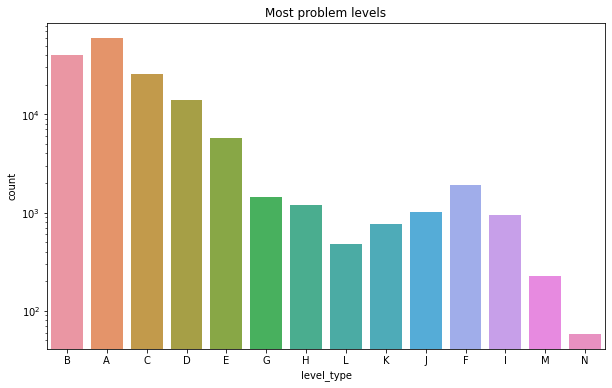

In [116]:
plt.figure(figsize=(10, 6))
sns.countplot(df['level_type'])
plt.yscale("log")
plt.title('Most problem levels')

In [117]:
level_type_df = df.groupby('level_type').sum().reset_index().sort_values(by='problem_solved', ascending=False)
level_type_df.head()

,level_type,attempts_range,points,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,registration_time_seconds
0,A,92715,30220542.0,17040281,15147962,176244,2251119,90703216117036,2.263337e+07,1.982560e+07,86611971566494
1,B,71220,36621270.0,13510774,12118301,160676,1928531,60753125503284,1.592847e+07,1.439180e+07,57809257844686
2,C,50681,33646314.0,11112697,10098747,180666,1893861,38907498947141,1.111700e+07,1.030078e+07,36807821074263
3,D,27990,22458750.0,6995314,6416324,137839,1372379,20837921818744,6.406958e+06,5.988749e+06,19600078508795
4,E,12361,9441500.0,3387765,3125850,78801,786478,8660531144755,2.814973e+06,2.642168e+06,8108209437696


Text(0.5, 1.0, 'Most solved problems')

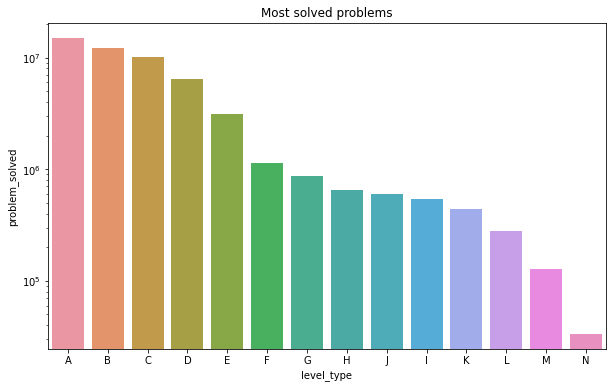

In [118]:
plt.figure(figsize=(10, 6))
sns.barplot(x=level_type_df['level_type'], y=level_type_df['problem_solved'])
plt.yscale("log")
plt.title('Most solved problems')

In [119]:
tags = df.tags.str.split(',')

In [120]:
tags.dropna(inplace=True)

In [121]:
tag_list = tags.explode().to_list()

In [122]:
len(set(tag_list))

36

In [123]:
def find_frequency(my_list):
  d = {}
  for item in my_list:
    if item not in d:
      d[item] = 1
    else:
      d[item] += 1
  return d

In [124]:
tag_dict = find_frequency(tag_list)

In [125]:
tag_dict

{'*special': 875,
 '2-sat': 397,
 'binary search': 11985,
 'bitmasks': 2402,
 'brute force': 26814,
 'chinese remainder theorem': 65,
 'combinatorics': 2820,
 'constructive algorithms': 17912,
 'data structures': 13024,
 'dfs and similar': 10869,
 'divide and conquer': 1301,
 'dp': 16264,
 'dsu': 3079,
 'expression parsing': 484,
 'fft': 110,
 'flows': 334,
 'games': 2597,
 'geometry': 4013,
 'graph matchings': 774,
 'graphs': 5943,
 'greedy': 27458,
 'hashing': 1639,
 'implementation': 76759,
 'math': 32230,
 'matrices': 488,
 'meet-in-the-middle': 235,
 'number theory': 7739,
 'probabilities': 1417,
 'schedules': 80,
 'shortest paths': 1798,
 'sortings': 14826,
 'string suffix structures': 378,
 'strings': 10424,
 'ternary search': 443,
 'trees': 5013,
 'two pointers': 4385}

In [126]:
tag_df = pd.DataFrame(tag_dict.items(), columns=['tag', 'count'])
tag_df.head()

,tag,count
0,strings,10424
1,implementation,76759
2,brute force,26814
3,greedy,27458
4,sortings,14826


In [127]:
tag_df.sort_values(by='count', ascending=False, inplace=True)
tag_df.head(10)

,tag,count
1,implementation,76759
6,math,32230
3,greedy,27458
2,brute force,26814
5,constructive algorithms,17912
8,dp,16264
4,sortings,14826
10,data structures,13024
16,binary search,11985
7,dfs and similar,10869


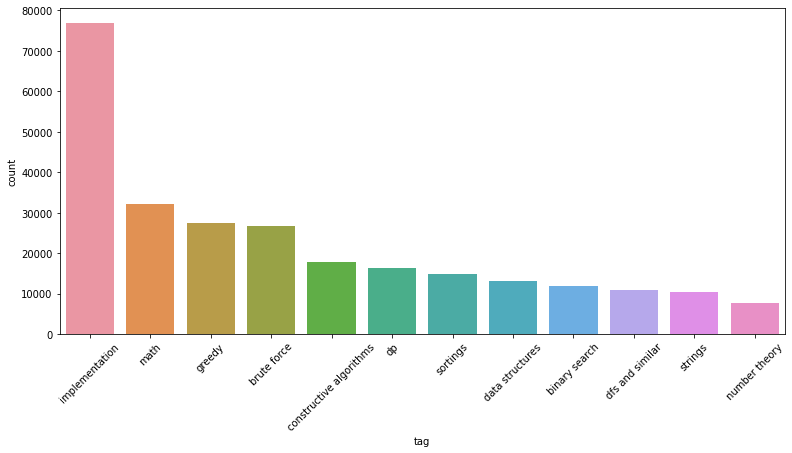

In [128]:
plt.figure(figsize=(13, 6))
sns.barplot(x=tag_df['tag'].head(12), y=tag_df['count'].head(12))
plt.xticks(rotation=45)
plt.show()

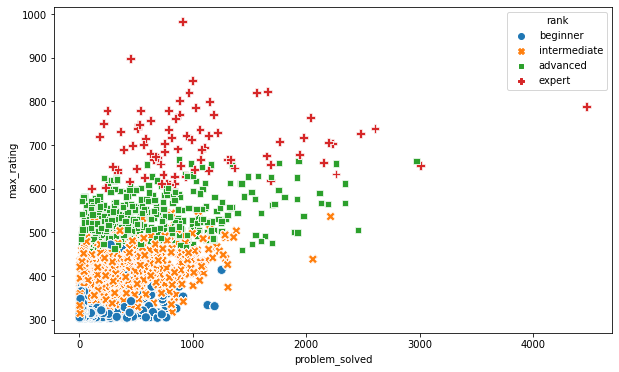

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['problem_solved'], y=df['max_rating'], hue=df['rank'], style=df['rank'], s=80)
plt.show()

In [130]:
df['rank'].unique()

array(['beginner', 'intermediate', 'advanced', 'expert'], dtype=object)

In [131]:
user_df = df[df['user_id'] == 'user_233']
user_df.head()

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
43846,user_233,prob_5071,1,A,500.0,implementation,87,64,0,India,3,1505190272,321.101,255.734,beginner,1300288967
43847,user_233,prob_2605,1,A,500.0,"brute force,graphs,math",87,64,0,India,3,1505190272,321.101,255.734,beginner,1300288967
43848,user_233,prob_2624,1,A,500.0,implementation,87,64,0,India,3,1505190272,321.101,255.734,beginner,1300288967
43849,user_233,prob_3465,2,A,500.0,"implementation,sortings,strings",87,64,0,India,3,1505190272,321.101,255.734,beginner,1300288967
43850,user_233,prob_5781,1,A,500.0,"implementation,math",87,64,0,India,3,1505190272,321.101,255.734,beginner,1300288967


In [132]:
x_values = np.arange(0, user_df.shape[0])

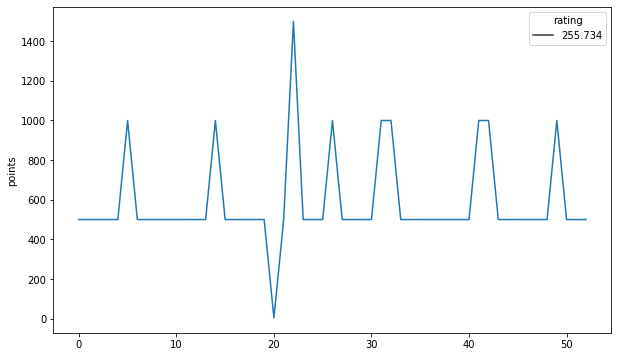

In [133]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_values, y=user_df['points'], style=user_df['rating'])

In [134]:
users_df = df['country'].value_counts().head(10)

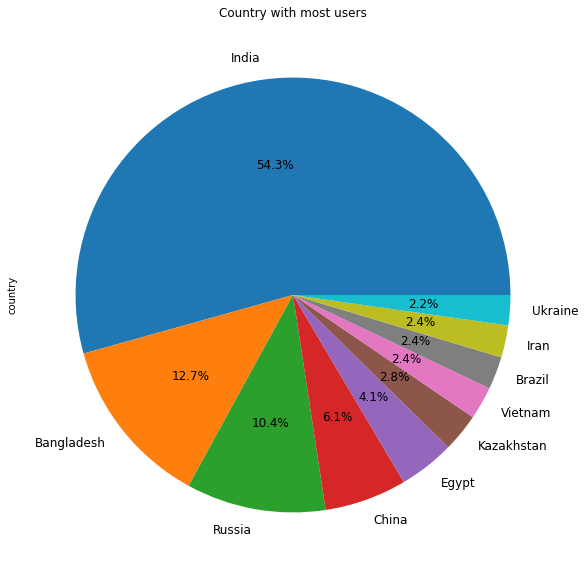

In [135]:
plt.figure(figsize=(10, 10))
plt.title('Country with most users')
users_df.plot.pie(y=df.values, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.show()

In [136]:
expert_df = df[df['rank']=='expert']

In [137]:
expert_df['country'].value_counts()

Russia         2156
China           467
Ukraine         345
India           343
Taiwan          329
Poland          314
Japan           211
South Korea     128
Belarus         108
Lithuania       100
Iran             93
Philippines      78
Romania          68
Kazakhstan       62
Croatia          52
Finland          49
Vietnam          48
Malaysia         44
Canada           44
Name: country, dtype: int64

In [138]:
exp_values = expert_df['country'].value_counts().head(10)

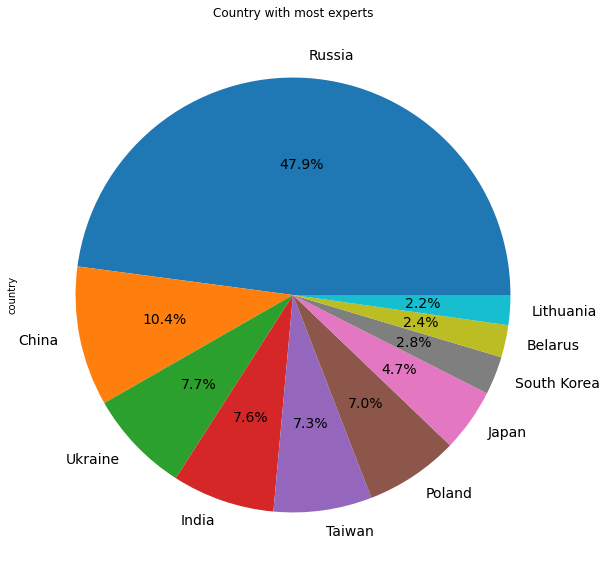

In [139]:
plt.figure(figsize=(10,10))
plt.title('Country with most experts')
exp_values.plot.pie(y=exp_values.values, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

**Label Encoding**

In [140]:
df['level_type'].value_counts()

A    60336
B    40406
C    25869
D    13854
E     5757
F     1896
G     1454
H     1183
J     1015
I      955
K      759
L      480
M      227
N       58
Name: level_type, dtype: int64

In [141]:
label_encoder = preprocessing.LabelEncoder()
df['level_type']= label_encoder.fit_transform(df['level_type'])
df[['level_type']].head()

,level_type
0,1
1,0
2,0
3,2
4,0


In [142]:
df[['level_type']].tail()

,level_type
155290,1
155291,8
155292,4
155293,2
155294,0


**One-Hot Encoding**

In [143]:
df['rank'].value_counts()

intermediate    66216
beginner        53134
advanced        29860
expert           5039
Name: rank, dtype: int64

In [144]:
df = pd.get_dummies(df, columns=['rank'], prefix='Rank')
df.iloc[:,15:].head()

,Rank_advanced,Rank_beginner,Rank_expert,Rank_intermediate
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [145]:
df.iloc[:,15:].tail()

,Rank_advanced,Rank_beginner,Rank_expert,Rank_intermediate
155290,0,1,0,0
155291,0,0,0,1
155292,0,0,0,1
155293,0,0,0,1
155294,0,0,0,1


In [146]:
df['registration_time'] = pd.to_datetime(df['registration_time_seconds'], unit='s')
df[['registration_time']].tail()

,registration_time
155290,2015-03-20 00:29:29
155291,2010-02-01 18:05:37
155292,2010-02-01 18:05:37
155293,2010-02-01 18:05:37
155294,2017-01-12 15:08:06


In [147]:
df['last_online'] = pd.to_datetime(df['last_online_time_seconds'], unit='s')
df[['last_online']].tail()

,last_online
155290,2017-08-15 13:56:29
155291,2017-01-12 19:45:34
155292,2017-01-12 19:45:34
155293,2017-01-12 19:45:34
155294,2017-09-10 18:57:24


In [148]:
df.drop(columns=['last_online_time_seconds', 'registration_time_seconds'], axis=1, inplace=True)
df.head()

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,max_rating,rating,Rank_advanced,Rank_beginner,Rank_expert,Rank_intermediate,registration_time,last_online
0,user_232,prob_6507,1,1,1000.0,strings,53,47,0,Bangladesh,1,307.913,206.709,0,1,0,0,2015-05-20 08:35:35,2017-08-25 04:02:58
1,user_232,prob_5071,4,0,500.0,implementation,53,47,0,Bangladesh,1,307.913,206.709,0,1,0,0,2015-05-20 08:35:35,2017-08-25 04:02:58
2,user_232,prob_703,2,0,500.0,"brute force,implementation",53,47,0,Bangladesh,1,307.913,206.709,0,1,0,0,2015-05-20 08:35:35,2017-08-25 04:02:58
3,user_232,prob_3935,1,2,1000.0,"greedy,sortings",53,47,0,Bangladesh,1,307.913,206.709,0,1,0,0,2015-05-20 08:35:35,2017-08-25 04:02:58
4,user_232,prob_164,2,0,500.0,"brute force,constructive algorithms,math",53,47,0,Bangladesh,1,307.913,206.709,0,1,0,0,2015-05-20 08:35:35,2017-08-25 04:02:58


In [149]:
df.dtypes

user_id                      object
problem_id                   object
attempts_range                int64
level_type                    int64
points                      float64
tags                         object
submission_count              int64
problem_solved                int64
contribution                  int64
country                      object
follower_count                int64
max_rating                  float64
rating                      float64
Rank_advanced                 uint8
Rank_beginner                 uint8
Rank_expert                   uint8
Rank_intermediate             uint8
registration_time    datetime64[ns]
last_online          datetime64[ns]
dtype: object